# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Eduardo Garcia do Nascimento

**RA/CPF**: 22008732800


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para entendê-la melhor, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "data"

import numpy as np  # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time


if __name__ == '__main__':
                       
    # importa o arquivo e guarda em um dataframe do Pandas
    set1_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set1.csv'), sep=',', low_memory=False)
    set2_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set2.csv'), sep=',', low_memory=False) 
    set3_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set3.csv'), sep=',', low_memory=False) 

    # Concatena os datasets em somente um
    frames = [ set1_dataset,set2_dataset,set3_dataset ]
    input_dataset = pd.concat(frames, axis=1)

    # Concatena as classes junto ao dataframe de atributos
    train_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'train.csv'), sep=',')
    input_dataset['classe'] = np.nan
    input_dataset.loc[train_dataset['Id'].values,'classe'] = train_dataset['Class'].values

    print('Dados concatenados produzindo um total de %d atributos' % 
            input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].shape[1])
    
    print('O número de amostras com classificação válida é: %d' % 
            input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].shape[0])

    print('Dados de treinamento carregados com sucesso!')

    test_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'test.csv'), sep=',')

    print('Dados de teste carregados com sucesso!')
   
    duration = 0.5  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Dados concatenados produzindo um total de 310 atributos
O número de amostras com classificação válida é: 4310
Dados de treinamento carregados com sucesso!
Dados de teste carregados com sucesso!


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário)

Preenchendo arrays a partir dos datasets de entrada com dados cuja a classe é definida
X (60842, 306)
y (60842, 1)
Removendo atributos com baixa variância....................................
Atributos removidos por baixa variância: 6
Removendo atributos com alta correlação....................................
Balanceando amostras das classes: Antes: -1=4038 1=272
Outliers encontrados e removidos: 1358609


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0137,D0138,D0139,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,2.564949,2.564949,2.079442,2.079442,1.000000,1.000000,0.336472,0.336472,2.197225,2.197225,...,1.000000,0.024,0.040,2.180207,0.850000,-16.015176,0.000000,0.447179,-14.656926,0.018882
1,2.833213,2.197225,2.197225,2.197225,0.333333,1.000000,-0.323004,0.000000,2.197225,2.186051,...,NaN,0.020,0.058,1.867641,0.850000,-16.552813,1.781575,1.377964,-16.016694,0.025232
2,3.091042,3.091042,2.833213,2.833213,0.941176,0.941176,0.266722,0.266722,2.928838,2.928838,...,1.000000,0.046,0.028,2.627386,0.800000,-16.548139,0.344645,0.108658,-15.307439,-0.000148
3,3.871201,3.784190,0.000000,3.737670,0.000000,0.976190,1.637311,2.216004,0.000000,0.953678,...,NaN,0.226,0.030,3.216561,0.829762,-14.697490,0.303174,0.401714,-14.083293,0.005164
4,3.688879,3.688879,3.135494,3.135494,0.652174,NaN,-2.175233,-2.175233,7.036531,7.036531,...,1.000000,0.084,0.050,3.135548,NaN,NaN,0.589175,0.100116,-13.572599,-0.000632
5,7.160069,6.442540,0.000000,3.178054,0.000000,0.666667,NaN,3.897234,6.442540,2.359280,...,NaN,NaN,0.038,5.476159,0.566667,-12.069193,1.505100,0.357536,-10.992013,-0.146300
6,6.877296,6.885510,2.079442,3.178054,1.000000,0.880000,3.942518,3.953152,5.791997,5.090801,...,1.107421,NaN,0.034,5.852683,0.748000,-12.741077,0.000000,0.081810,-11.460218,0.000516
7,6.844815,6.844815,3.970292,3.970292,0.075472,NaN,3.473438,3.473438,4.530772,4.530772,...,1.000000,NaN,0.046,5.818093,NaN,-11.983040,1.424396,1.454859,-12.039741,-0.053146
8,1.609438,1.609438,0.693147,0.693147,0.000000,NaN,-0.640779,-0.640779,0.405465,0.405465,...,1.000000,0.054,0.056,1.368022,NaN,-17.207213,0.434202,1.788514,-17.173907,NaN
9,4.043051,4.043051,2.197225,2.197225,1.000000,1.000000,0.429068,0.429068,3.214868,3.214868,...,1.000000,0.090,0.034,3.436594,0.850000,-15.812102,0.957110,0.443102,-14.505732,0.004381


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0137,D0138,D0139,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,2.564949,2.564949,2.079442,2.079442,1.000000,1.000000,0.336472,0.336472,2.197225,2.197225,...,1.000000,0.024,0.040,2.180207,0.850000,-16.015176,0.000000,0.447179,-14.656926,0.018882
1,2.833213,2.197225,2.197225,2.197225,0.333333,1.000000,-0.323004,0.000000,2.197225,2.186051,...,1.000000,0.020,0.058,1.867641,0.850000,-16.552813,1.781575,1.377964,-16.016694,0.025232
2,3.091042,3.091042,2.833213,2.833213,0.941176,0.941176,0.266722,0.266722,2.928838,2.928838,...,1.000000,0.046,0.028,2.627386,0.800000,-16.548139,0.344645,0.108658,-15.307439,-0.000148
3,3.871201,3.784190,0.000000,3.737670,0.000000,0.976190,1.637311,2.216004,0.000000,0.953678,...,1.000000,0.226,0.030,3.216561,0.829762,-14.697490,0.303174,0.401714,-14.083293,0.005164
4,3.688879,3.688879,3.135494,3.135494,0.652174,1.000000,-2.175233,-2.175233,7.036531,7.036531,...,1.000000,0.084,0.050,3.135548,0.850000,-15.757007,0.589175,0.100116,-13.572599,-0.000632
5,7.160069,6.442540,0.000000,3.178054,0.000000,0.666667,-0.277632,3.897234,6.442540,2.359280,...,1.000000,0.026,0.038,5.476159,0.566667,-12.069193,1.505100,0.357536,-10.992013,-0.146300
6,6.877296,6.885510,2.079442,3.178054,1.000000,0.880000,3.942518,3.953152,5.791997,5.090801,...,1.107421,0.026,0.034,5.852683,0.748000,-12.741077,0.000000,0.081810,-11.460218,0.000516
7,6.844815,6.844815,3.970292,3.970292,0.075472,1.000000,3.473438,3.473438,4.530772,4.530772,...,1.000000,0.026,0.046,5.818093,0.850000,-11.983040,1.424396,1.454859,-12.039741,-0.053146
8,1.609438,1.609438,0.693147,0.693147,0.000000,1.000000,-0.640779,-0.640779,0.405465,0.405465,...,1.000000,0.054,0.056,1.368022,0.850000,-17.207213,0.434202,1.788514,-17.173907,-0.004309
9,4.043051,4.043051,2.197225,2.197225,1.000000,1.000000,0.429068,0.429068,3.214868,3.214868,...,1.000000,0.090,0.034,3.436594,0.850000,-15.812102,0.957110,0.443102,-14.505732,0.004381


Balanceando amostras das classes: Depois: -1=4038 1=272
Separando a base em treino e teste
Extraindo os melhores atributos dentre os 300 atributos de X_train.
Número de atributos restantes após a operação: 7
Extraindo os melhores atributos dentre os 300 atributos de X.
Número de atributos restantes após a operação: 91
(3017, 7)
(3017,)
Imprimindo projeção em PCA.........................................


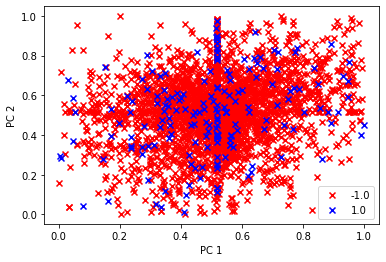

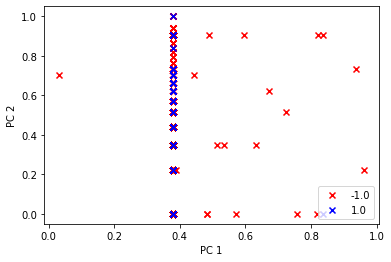

Imprimindo boxplot dos atributos.......................................


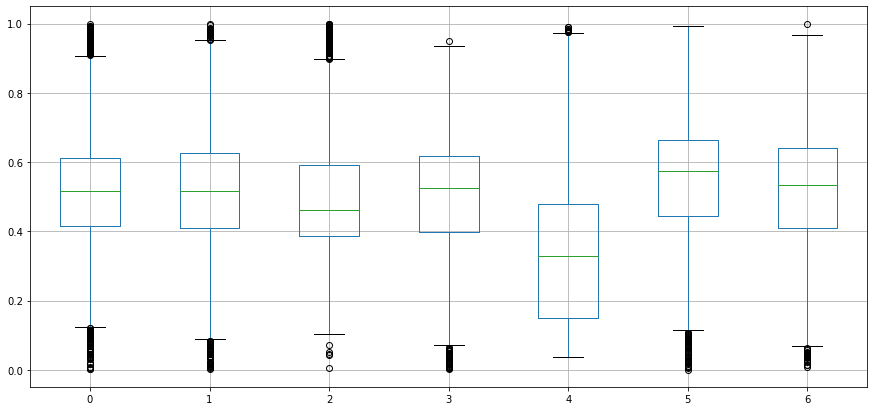

190
0
2827

Dimensao de X_train:  (3017, 7)

Dimensao de X:  (4310, 91)

Dimensao de y_train:  (3017,)

Dimensao de y:  (4310,)

Classes do problema:  [-1.  1.]

Classes do problema:  [-1.  1.]


In [39]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelSpreading
import utils
import numpy as np
from sklearn.impute import SimpleImputer

#df = pd.DataFrame(data=[[2,3,200],[4,3,4],[2,3,2],[2,2,2],[2,3,2]])
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
#print(mask)
#df[mask] = np.nan
#display(df.head(10))
#break

if True:
    print('Preenchendo arrays a partir dos datasets de entrada com dados cuja a classe é definida')
    X = input_dataset.drop('classe', axis=1).drop('Id', axis=1).values
    y = input_dataset[['classe']].values
    print('X',X.shape)
    print('y',y.shape)

    print('Removendo atributos com baixa variância....................................')
    variance_mask = VarianceThreshold().fit(X).get_support()
    X = X.iloc[:,variance_mask]
    print('Atributos removidos por baixa variância: %d' % np.sum(~variance_mask))

    #print('Removendo atributos com alta correlação....................................')
    #X, corr_mask = utils.remove_correlated(X, 0.95)
    #print('Atributos removido por alta correlação: %d' % len(corr_mask))

    #print('Balanceando amostras das classes: Antes: -1=%d 1=%d' % (np.sum(y==-1), np.sum(y==1)))
    #X = utils.remove_outliersandnan(X)
    
    X = X.replace([np.inf, -np.inf], np.nan)
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X.loc[:,:] = imputer.fit_transform(X)
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    mask = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
    print('Outliers encontrados e removidos: %d' % np.count_nonzero(mask == True))
    X.loc[:,:] = np.where((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)), np.nan, X)
    display(X.head(10))
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X.loc[:,:] = imputer.fit_transform(X)
    display(X.head(10))
    
    print('Balanceando amostras das classes: Depois: -1=%d 1=%d' % (np.sum(y==-1), np.sum(y==1)))

    #print('Normalizing scale between 0 and 1..................................')
    X = pd.DataFrame(data=MinMaxScaler().fit_transform(X))
    K = X.loc[test_dataset.iloc[:,:].values.T[0]].values

    #Xsemi = input_dataset.loc[(input_dataset['classe'] != -1) & (input_dataset['classe'] != 1)].drop('classe', axis=1).drop('Id', axis=1).values
    X = X.iloc[((y == -1).values) | ((y == 1).values)].values
    y = y.loc[((y == -1).values) | ((y == 1).values),'classe'].values
    print('Separando a base em treino e teste')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

    #Xsemi = MinMaxScaler().fit_transform(Xsemi)
    print('Extraindo os melhores atributos dentre os %d atributos de X_train.' % X_train.shape[1])
    estimator = DecisionTreeClassifier(random_state=1)
    selector = RFECV(estimator, step=1, cv=5)
    selector = selector.fit(X_train, y_train)
    X_train = X_train[:,selector.support_]
    X_test = X_test[:,selector.support_]
    print('Número de atributos restantes após a operação: %d' % X_train.shape[1])

    print('Extraindo os melhores atributos dentre os %d atributos de X.' % X.shape[1])
    estimator = DecisionTreeClassifier(random_state=1)
    selector = RFECV(estimator, step=1, cv=5)
    selector = selector.fit(X, y)
    X = X[:,selector.support_]
    K = K[:,selector.support_]
    print('Número de atributos restantes após a operação: %d' % X.shape[1])

    #print('Adding semi supervising samples ......................................')
    #X_train = np.concatenate((X_train, Xsemi[0:15000]))
    #y_train = np.concatenate((y_train, np.full(15000, np.inf)))
    #y_train = np.where(y_train==-1, 0, y_train)
    #y_train = np.where(y_train==np.inf, -1, y_train)
    #label_prop_model = LabelSpreading()
    #y_train = label_prop_model.fit(X_train, y_train).predict(X_train)
    #y_train = np.where(y_train==0, -1, y_train)

    #print(X_train.shape)
    #print(y_train.shape)
    #np.savetxt("Xtrain.csv", np.append(X_train, y_train[:,None], 1), delimiter=",")
    
    
    print(X_train.shape)
    print(y_train.shape)
    print('Imprimindo projeção em PCA.........................................')
    pca = PCA(2)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(X_train)
    colors = ['r', 'b']
    markers = ['x', 'x']
    for l, c, m in zip(np.unique(y_train), colors, markers):
        plt.scatter(X_train[y_train==l, 0], 
                    X_train[y_train==l, 1], 
                    c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower right')
    plt.show()

    pca = PCA(2)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(X)
    colors = ['r', 'b']
    markers = ['x', 'x']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0], 
                    X[y==l, 1], 
                    c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower right')
    plt.show()

    print('Imprimindo boxplot dos atributos.......................................')
    df = pd.DataFrame(data=X_train)
    df.boxplot(figsize=(15,7))
    plt.show()

    print(np.sum(y_train==1))
    print(np.sum(y_train==0))
    print(np.sum(y_train==-1))


    print('\nDimensao de X_train: ', X_train.shape)
    print('\nDimensao de X: ', X.shape)

    print('\nDimensao de y_train: ', y_train.shape)
    print('\nDimensao de y: ', y.shape)

    print('\nClasses do problema: ', np.unique(y_train))
    print('\nClasses do problema: ', np.unique(y))


    duration = 0.5  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

    time.sleep(0.5)

    duration = 0.5  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))
    
#except Exception as e:
#    print(e)
#    duration = 1.5  # seconds
#    freq = 880  # Hz
#    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais ensinados no curso e executando os métodos inteligentes

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf

   
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

model = LogisticRegression(random_state=1, max_iter=15000)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("LR Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("LR Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("LR AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X_train, y_train, cv=cv)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))
    
model = RandomForestClassifier(max_depth=2, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("RR Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("RR Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("RR AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

print('Printing model to submission.csv')
y_pred = model.fit(X, y).predict(K)
y_pred_submission = model.fit(X, y).predict_proba(K)[:,1]
result = np.zeros((K.shape[0],2))
for i in range(K.shape[0]):
    result[i][0] = test_dataset.iloc[:,:].values.T[0][i]
    result[i][1] = y_pred_submission[i]
resultdf = pd.DataFrame(data=result, columns=["Id", "Predicted"])
resultdf['Id'] = resultdf['Id'].astype(int)
resultdf['Predicted'] = resultdf['Predicted'].round(decimals=5)
resultdf.to_csv('submission.csv', index=False, float_format='%.5f')

model = MultinomialNB()
y_pred = model.fit(X_train, y_train).predict(X_train)
print("MNB Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("MNB Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("MNB AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
#plot_confusion_matrix(model, X_test, y_test)
#plt.show()
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))



model = svm.SVC(decision_function_shape='ovo', probability=True,random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("SVM Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
#plot_confusion_matrix(model, X_test, y_test)
#plt.show()
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))


if True:    
    model = KNeighborsClassifier()
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("KNN Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X_train, y_train).predict_proba(X_test)
    print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
    #print(classification_report(y_test, y_pred))
    #plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test, y_pred))
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

    model = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(300,), random_state=1, max_iter=5000)
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("NN Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("NN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X_train, y_train).predict_proba(X_test)
    print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
    #print(classification_report(y_test, y_pred))
    #plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test, y_pred))
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

time.sleep(0.5)
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

time.sleep(0.5)
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))



Amostras =1 mantidas: 2354 de 3101


IndexError: boolean index did not match indexed array along dimension 0; dimension is 4310 but corresponding boolean dimension is 3101

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos